# generate matrix

In [228]:
import numpy as np

def generate_symmetric_matrix(size, min_val=1, max_val=10):
    """
    Generate a symmetric matrix with zeros on the diagonal.
    
    :param size: The size of the square matrix.
    :param min_val: Minimum value for off-diagonal elements.
    :param max_val: Maximum value for off-diagonal elements.
    :return: A symmetric matrix with zeros on the diagonal.
    """
    # Initialize matrix with zeros
    matrix = np.zeros((size, size), dtype=int)
    
    # Fill upper triangular part with random values
    for i in range(size):
        for j in range(i + 1, size):
            matrix[i, j] = np.random.randint(min_val, max_val + 1)
            matrix[j, i] = matrix[i, j]  # Mirror to lower triangular part
    
    return matrix

# Example usage

size = 30
matrix = generate_symmetric_matrix(size)


print(matrix)
matrix

[[ 0  9  4 10  3  3  6  8  9  5  7  6  6  7  7 10  4  5  8  7  8  9  2  7
   6  7  9  3  6  6]
 [ 9  0  2  2  1  2  9  1  9  7  4  8  4  8  3  6  4  2  2  4  7  9 10  8
   8 10 10  2  1  4]
 [ 4  2  0  9  9  7  6  5  9  8  4  3  4  2  4  7  2  2  6  1  2  1  9  3
   3  4  2  3  3  5]
 [10  2  9  0  2 10  7  2  5  7  1  8  1  1  9  1  9  4  7  1  3  1  9  4
   9  1  3  7  6  7]
 [ 3  1  9  2  0 10  5  7  7  5 10  5  3  2  8 10  1  8  1  6  1  7 10 10
   9  6  2  7  5  1]
 [ 3  2  7 10 10  0 10  3  1  3  3  3 10  1  5  9  2  2 10  9  1  9  6  4
   4  1  4  7  7  9]
 [ 6  9  6  7  5 10  0  5  4  6 10  8  4  3  7  6  4 10  1  9 10  8 10  4
   3  7  1  8  4  5]
 [ 8  1  5  2  7  3  5  0  3  9  3  8  1  6  3  7 10 10 10  9  2  3  6  5
   9  3  3  4  3  2]
 [ 9  9  9  5  7  1  4  3  0  1  4  5  8  4  4  4  1  1 10  6  2  5  5  6
   9  3  4  4  4  9]
 [ 5  7  8  7  5  3  6  9  1  0  9  7  7  3  8  1 10  3 10  5  4  3  2  8
   5  3  2  8  5  3]
 [ 7  4  4  1 10  3 10  3  4  9  0  2  9  5  8  2 

array([[ 0,  9,  4, 10,  3,  3,  6,  8,  9,  5,  7,  6,  6,  7,  7, 10,
         4,  5,  8,  7,  8,  9,  2,  7,  6,  7,  9,  3,  6,  6],
       [ 9,  0,  2,  2,  1,  2,  9,  1,  9,  7,  4,  8,  4,  8,  3,  6,
         4,  2,  2,  4,  7,  9, 10,  8,  8, 10, 10,  2,  1,  4],
       [ 4,  2,  0,  9,  9,  7,  6,  5,  9,  8,  4,  3,  4,  2,  4,  7,
         2,  2,  6,  1,  2,  1,  9,  3,  3,  4,  2,  3,  3,  5],
       [10,  2,  9,  0,  2, 10,  7,  2,  5,  7,  1,  8,  1,  1,  9,  1,
         9,  4,  7,  1,  3,  1,  9,  4,  9,  1,  3,  7,  6,  7],
       [ 3,  1,  9,  2,  0, 10,  5,  7,  7,  5, 10,  5,  3,  2,  8, 10,
         1,  8,  1,  6,  1,  7, 10, 10,  9,  6,  2,  7,  5,  1],
       [ 3,  2,  7, 10, 10,  0, 10,  3,  1,  3,  3,  3, 10,  1,  5,  9,
         2,  2, 10,  9,  1,  9,  6,  4,  4,  1,  4,  7,  7,  9],
       [ 6,  9,  6,  7,  5, 10,  0,  5,  4,  6, 10,  8,  4,  3,  7,  6,
         4, 10,  1,  9, 10,  8, 10,  4,  3,  7,  1,  8,  4,  5],
       [ 8,  1,  5,  2,  7,  3,  5,  0,  

# mcmc code

In [255]:
import numpy as np

def calculate_total_distance(route, dist_matrix):
    """Calculate the total distance of a route."""
    n = len(route)
    return sum(dist_matrix[route[i]][route[(i + 1) % n]] for i in range(n))

def generate_initial_route(n):
    """Generate a random permutation of cities."""
    return np.random.permutation(n).tolist()

def generate_neighbor(route):
    """Swap two adjacent cities in the route (with wraparound)."""
    n = len(route)
    i = np.random.randint(n)
    j = (i + 1) % n
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route, i

def calculate_delta(route, swapped_index, dist_matrix):
    """Compute the change in distance from swapping adjacent cities."""
    n = len(route)
    i = swapped_index
    j = (i + 1) % n
    prev = (i - 1) % n
    next_ = (j + 1) % n
    
    a, b, c, d = route[prev], route[i], route[j], route[next_]
    
    old_cost = dist_matrix[a][b] + dist_matrix[b][c] + dist_matrix[c][d]
    new_cost = dist_matrix[a][c] + dist_matrix[c][b] + dist_matrix[b][d]
    return new_cost - old_cost

def tsp_mcmc(dist_matrix, num_iter, T, initial_route=None):
    """MCMC algorithm for solving TSP."""
    n = len(dist_matrix)
    current_route = generate_initial_route(n) if initial_route is None else initial_route.copy()
    current_distance = calculate_total_distance(current_route, dist_matrix)
    best_route, best_distance = current_route.copy(), current_distance
    
    for _ in range(num_iter):
        print(_)
        new_route, swapped_i = generate_neighbor(current_route)
        delta = calculate_delta(current_route, swapped_i, dist_matrix)
        
        if delta < 0 or (T > 0 and np.random.rand() < np.exp(-delta / T)):
            current_route = new_route
            current_distance += delta
            
            if current_distance < best_distance:
                best_route, best_distance = current_route.copy(), current_distance
                
    return best_route, best_distance


# run

In [287]:
# dist_matrix = np.array([[ 0,  2,  1,  7,  3,  8,  3,  2,  3,  4,  1,  8, 10,  7,  1,  2,
#          1,  2,  8,  7],
#        [ 2,  0,  5,  1, 10,  1,  2, 10,  1,  2,  4,  7,  1,  9,  9,  7,
#          3,  5, 10,  1],
#        [ 1,  5,  0,  1, 10,  9,  4,  1,  6,  8,  7,  5,  3,  9,  2,  1,
#          1,  2,  2,  2],
#        [ 7,  1,  1,  0,  9,  3,  9,  2,  2,  2,  3,  3,  3,  8,  4,  1,
#          6,  1,  8,  7],
#        [ 3, 10, 10,  9,  0,  3,  3,  3,  4, 10,  6,  1, 10,  3,  4,  8,
#          2,  8,  6,  9],
#        [ 8,  1,  9,  3,  3,  0,  7, 10,  5,  3,  1,  1,  7,  4,  9,  7,
#          8,  6,  3,  7],
#        [ 3,  2,  4,  9,  3,  7,  0,  8,  7,  2,  1, 10,  6,  2,  6,  2,
#         10, 10,  6,  1],
#        [ 2, 10,  1,  2,  3, 10,  8,  0,  5,  4,  3,  5,  9,  2,  6,  4,
#          2,  3,  1,  7],
#        [ 3,  1,  6,  2,  4,  5,  7,  5,  0,  7,  7, 10,  2,  7,  6,  1,
#          4,  8,  2,  5],
#        [ 4,  2,  8,  2, 10,  3,  2,  4,  7,  0,  6,  4,  7,  4,  8,  7,
#          2,  6,  2,  7],
#        [ 1,  4,  7,  3,  6,  1,  1,  3,  7,  6,  0,  7, 10,  3,  7,  3,
#          9,  6,  9,  6],
#        [ 8,  7,  5,  3,  1,  1, 10,  5, 10,  4,  7,  0, 10,  1,  1,  1,
#          4,  6,  1,  8],
#        [10,  1,  3,  3, 10,  7,  6,  9,  2,  7, 10, 10,  0,  8, 10,  9,
#          8,  8,  2,  7],
#        [ 7,  9,  9,  8,  3,  4,  2,  2,  7,  4,  3,  1,  8,  0,  5,  5,
#          1,  2,  7,  3],
#        [ 1,  9,  2,  4,  4,  9,  6,  6,  6,  8,  7,  1, 10,  5,  0,  1,
#          3,  9,  8,  5],
#        [ 2,  7,  1,  1,  8,  7,  2,  4,  1,  7,  3,  1,  9,  5,  1,  0,
#          2,  3, 10,  1],
#        [ 1,  3,  1,  6,  2,  8, 10,  2,  4,  2,  9,  4,  8,  1,  3,  2,
#          0,  2,  1,  8],
#        [ 2,  5,  2,  1,  8,  6, 10,  3,  8,  6,  6,  6,  8,  2,  9,  3,
#          2,  0,  9,  8],
#        [ 8, 10,  2,  8,  6,  3,  6,  1,  2,  2,  9,  1,  2,  7,  8, 10,
#          1,  9,  0,  2],
#        [ 7,  1,  2,  7,  9,  7,  1,  7,  5,  7,  6,  8,  7,  3,  5,  1,
#          8,  8,  2,  0]])

dist_matrix = matrix

best_route, best_distance = tsp_mcmc(dist_matrix, num_iter=90000, T=0.1)
print(f"Optimal Route: {best_route}, Distance: {best_distance}")





Optimal Route: [0, 0, 6, 8, 3, 21, 27, 13, 2, 19, 23, 14, 7, 12, 24, 4, 20, 22, 28, 11, 29, 26, 9, 25, 17, 1, 18, 16, 10, 5], Distance: 102


In [264]:
print(f"Optimal Route: {best_route}, Distance: {best_distance}")


Optimal Route: [23, 10, 3, 12, 25, 9, 6, 4, 20, 22, 13, 18, 15, 19, 24, 16, 0, 27, 1, 5, 17, 2, 21, 26, 14, 8, 7, 29, 28, 11], Distance: 89


In [142]:
import numpy as np

def calculate_total_distance(route, dist_matrix):
    """Calculate the total distance of a route."""
    n = len(route)
    return sum(dist_matrix[route[i]][route[(i + 1) % n]] for i in range(n))

def generate_initial_route(n, start_city):
    """Generate a permutation starting with a specific city."""
    remaining_cities = [city for city in range(n) if city != start_city]
    np.random.shuffle(remaining_cities)
    return [start_city] + remaining_cities

def generate_neighbor(route):
    """Swap two adjacent cities in the route (with wraparound)."""
    n = len(route)
    i = np.random.randint(n)
    j = (i + 1) % n
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route, i

def calculate_delta(route, swapped_index, dist_matrix):
    """Compute the change in distance from swapping adjacent cities."""
    n = len(route)
    i = swapped_index
    j = (i + 1) % n
    prev = (i - 1) % n
    next_ = (j + 1) % n
    
    a, b, c, d = route[prev], route[i], route[j], route[next_]
    
    old_cost = dist_matrix[a][b] + dist_matrix[b][c] + dist_matrix[c][d]
    new_cost = dist_matrix[a][c] + dist_matrix[c][b] + dist_matrix[b][d]
    return new_cost - old_cost

def tsp_mcmc(dist_matrix, num_iter, T, start_city=0):
    """MCMC algorithm for solving TSP with a fixed starting point."""
    n = len(dist_matrix)
    current_route = generate_initial_route(n, start_city)
    current_distance = calculate_total_distance(current_route, dist_matrix)
    best_route, best_distance = current_route.copy(), current_distance
    
    for _ in range(num_iter):
        new_route, swapped_i = generate_neighbor(current_route)
        
        # Ensure the start city remains fixed
        if new_route[0] != start_city:
            new_route = [start_city] + new_route[1:]
            # Adjust swapped_i if necessary
            if swapped_i == 0:
                swapped_i = 1
            elif swapped_i > 0:
                swapped_i -= 1
        
        delta = calculate_delta(current_route, swapped_i, dist_matrix)
        
        if delta < 0 or (T > 0 and np.random.rand() < np.exp(-delta / T)):
            current_route = new_route
            current_distance += delta
            
            if current_distance < best_distance:
                best_route, best_distance = current_route.copy(), current_distance
                
    return best_route, best_distance

# Example usage
dist_matrix = np.array([[ 0,  2,  1,  7,  3,  8,  3,  2,  3,  4,  1,  8, 10,  7,  1,  2,
         1,  2,  8,  7],
       [ 2,  0,  5,  1, 10,  1,  2, 10,  1,  2,  4,  7,  1,  9,  9,  7,
         3,  5, 10,  1],
       [ 1,  5,  0,  1, 10,  9,  4,  1,  6,  8,  7,  5,  3,  9,  2,  1,
         1,  2,  2,  2],
       [ 7,  1,  1,  0,  9,  3,  9,  2,  2,  2,  3,  3,  3,  8,  4,  1,
         6,  1,  8,  7],
       [ 3, 10, 10,  9,  0,  3,  3,  3,  4, 10,  6,  1, 10,  3,  4,  8,
         2,  8,  6,  9],
       [ 8,  1,  9,  3,  3,  0,  7, 10,  5,  3,  1,  1,  7,  4,  9,  7,
         8,  6,  3,  7],
       [ 3,  2,  4,  9,  3,  7,  0,  8,  7,  2,  1, 10,  6,  2,  6,  2,
        10, 10,  6,  1],
       [ 2, 10,  1,  2,  3, 10,  8,  0,  5,  4,  3,  5,  9,  2,  6,  4,
         2,  3,  1,  7],
       [ 3,  1,  6,  2,  4,  5,  7,  5,  0,  7,  7, 10,  2,  7,  6,  1,
         4,  8,  2,  5],
       [ 4,  2,  8,  2, 10,  3,  2,  4,  7,  0,  6,  4,  7,  4,  8,  7,
         2,  6,  2,  7],
       [ 1,  4,  7,  3,  6,  1,  1,  3,  7,  6,  0,  7, 10,  3,  7,  3,
         9,  6,  9,  6],
       [ 8,  7,  5,  3,  1,  1, 10,  5, 10,  4,  7,  0, 10,  1,  1,  1,
         4,  6,  1,  8],
       [10,  1,  3,  3, 10,  7,  6,  9,  2,  7, 10, 10,  0,  8, 10,  9,
         8,  8,  2,  7],
       [ 7,  9,  9,  8,  3,  4,  2,  2,  7,  4,  3,  1,  8,  0,  5,  5,
         1,  2,  7,  3],
       [ 1,  9,  2,  4,  4,  9,  6,  6,  6,  8,  7,  1, 10,  5,  0,  1,
         3,  9,  8,  5],
       [ 2,  7,  1,  1,  8,  7,  2,  4,  1,  7,  3,  1,  9,  5,  1,  0,
         2,  3, 10,  1],
       [ 1,  3,  1,  6,  2,  8, 10,  2,  4,  2,  9,  4,  8,  1,  3,  2,
         0,  2,  1,  8],
       [ 2,  5,  2,  1,  8,  6, 10,  3,  8,  6,  6,  6,  8,  2,  9,  3,
         2,  0,  9,  8],
       [ 8, 10,  2,  8,  6,  3,  6,  1,  2,  2,  9,  1,  2,  7,  8, 10,
         1,  9,  0,  2],
       [ 7,  1,  2,  7,  9,  7,  1,  7,  5,  7,  6,  8,  7,  3,  5,  1,
         8,  8,  2,  0]])


start_city = 0  # Start from city 0
num_iter = 10000
T = 0.001

best_route, best_distance = tsp_mcmc(dist_matrix, num_iter, T, start_city)
print(f"Best Route: {best_route}, Distance: {best_distance}")


Best Route: [0, 1, 2, 17, 3, 11, 13, 4, 14, 16, 9, 10, 15, 19, 18, 5, 12, 8, 7, 6], Distance: 66


In [274]:
import numpy as np

def calculate_total_distance(route, dist_matrix):
    """Calculate the total distance of a route."""
    n = len(route)
    return sum(dist_matrix[route[i]][route[(i + 1) % n]] for i in range(n))

def generate_initial_route(n, start_city):
    """Generate a permutation starting with a specific city."""
    remaining_cities = [city for city in range(n) if city != start_city]
    np.random.shuffle(remaining_cities)
    return [start_city] + remaining_cities

def generate_neighbor(route):
    """Swap two adjacent cities in the route (with wraparound)."""
    n = len(route)
    i = np.random.randint(n)
    j = (i + 1) % n
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route, i

def calculate_delta(route, swapped_index, dist_matrix):
    """Compute the change in distance from swapping adjacent cities."""
    n = len(route)
    i = swapped_index
    j = (i + 1) % n
    prev = (i - 1) % n
    next_ = (j + 1) % n
    
    a, b, c, d = route[prev], route[i], route[j], route[next_]
    
    old_cost = dist_matrix[a][b] + dist_matrix[b][c] + dist_matrix[c][d]
    new_cost = dist_matrix[a][c] + dist_matrix[c][b] + dist_matrix[b][d]
    return new_cost - old_cost

def tsp_mcmc(dist_matrix, num_iter, T, start_city=0):
    """MCMC algorithm for solving TSP with a fixed starting point."""
    T=100
    n = len(dist_matrix)
    np.random.seed(10)  # Fix the random seed
    current_route = generate_initial_route(n, start_city)
    current_distance = calculate_total_distance(current_route, dist_matrix)
    best_route, best_distance = current_route.copy(), current_distance
    
    for _ in range(num_iter):
        new_route, swapped_i = generate_neighbor(current_route)
        
        # Ensure the start city remains fixed
        if new_route[0] != start_city:
            new_route = [start_city] + new_route[1:]
            # Adjust swapped_i if necessary
            if swapped_i == 0:
                swapped_i = 1
            elif swapped_i > 0:
                swapped_i -= 1
        
        delta = calculate_delta(current_route, swapped_i, dist_matrix)
        
        if delta < 0 or (T > 0 and np.random.rand() < np.exp(-delta / T)):
            current_route = new_route
            current_distance += delta
            
            if current_distance < best_distance:
                best_route, best_distance = current_route.copy(), current_distance
                
    return best_route, best_distance

# Example usage
# dist_matrix = np.array([[ 0,  2,  1,  7,  3,  8,  3,  2,  3,  4,  1,  8, 10,  7,  1,  2,
#          1,  2,  8,  7],
#        [ 2,  0,  5,  1, 10,  1,  2, 10,  1,  2,  4,  7,  1,  9,  9,  7,
#          3,  5, 10,  1],
#        [ 1,  5,  0,  1, 10,  9,  4,  1,  6,  8,  7,  5,  3,  9,  2,  1,
#          1,  2,  2,  2],
#        [ 7,  1,  1,  0,  9,  3,  9,  2,  2,  2,  3,  3,  3,  8,  4,  1,
#          6,  1,  8,  7],
#        [ 3, 10, 10,  9,  0,  3,  3,  3,  4, 10,  6,  1, 10,  3,  4,  8,
#          2,  8,  6,  9],
#        [ 8,  1,  9,  3,  3,  0,  7, 10,  5,  3,  1,  1,  7,  4,  9,  7,
#          8,  6,  3,  7],
#        [ 3,  2,  4,  9,  3,  7,  0,  8,  7,  2,  1, 10,  6,  2,  6,  2,
#         10, 10,  6,  1],
#        [ 2, 10,  1,  2,  3, 10,  8,  0,  5,  4,  3,  5,  9,  2,  6,  4,
#          2,  3,  1,  7],
#        [ 3,  1,  6,  2,  4,  5,  7,  5,  0,  7,  7, 10,  2,  7,  6,  1,
#          4,  8,  2,  5],
#        [ 4,  2,  8,  2, 10,  3,  2,  4,  7,  0,  6,  4,  7,  4,  8,  7,
#          2,  6,  2,  7],
#        [ 1,  4,  7,  3,  6,  1,  1,  3,  7,  6,  0,  7, 10,  3,  7,  3,
#          9,  6,  9,  6],
#        [ 8,  7,  5,  3,  1,  1, 10,  5, 10,  4,  7,  0, 10,  1,  1,  1,
#          4,  6,  1,  8],
#        [10,  1,  3,  3, 10,  7,  6,  9,  2,  7, 10, 10,  0,  8, 10,  9,
#          8,  8,  2,  7],
#        [ 7,  9,  9,  8,  3,  4,  2,  2,  7,  4,  3,  1,  8,  0,  5,  5,
#          1,  2,  7,  3],
#        [ 1,  9,  2,  4,  4,  9,  6,  6,  6,  8,  7,  1, 10,  5,  0,  1,
#          3,  9,  8,  5],
#        [ 2,  7,  1,  1,  8,  7,  2,  4,  1,  7,  3,  1,  9,  5,  1,  0,
#          2,  3, 10,  1],
#        [ 1,  3,  1,  6,  2,  8, 10,  2,  4,  2,  9,  4,  8,  1,  3,  2,
#          0,  2,  1,  8],
#        [ 2,  5,  2,  1,  8,  6, 10,  3,  8,  6,  6,  6,  8,  2,  9,  3,
#          2,  0,  9,  8],
#        [ 8, 10,  2,  8,  6,  3,  6,  1,  2,  2,  9,  1,  2,  7,  8, 10,
#          1,  9,  0,  2],
#        [ 7,  1,  2,  7,  9,  7,  1,  7,  5,  7,  6,  8,  7,  3,  5,  1,
#          8,  8,  2,  0]])
dist_matrix = matrix

start_city = 18  # Start from city 0
num_iter = 10000
T = 0.01

best_route, best_distance = tsp_mcmc(dist_matrix, num_iter, T, start_city)
print(f"Best Route: {best_route}, Distance: {best_distance}")


Best Route: [18, 18, 18, 12, 21, 2, 5, 1, 27, 23, 19, 6, 13, 20, 24, 25, 3, 11, 22, 10, 28, 26, 29, 16, 8, 4, 0, 17, 18, 18], Distance: 134


In [268]:
matrix

array([[ 0,  9,  4, 10,  3,  3,  6,  8,  9,  5,  7,  6,  6,  7,  7, 10,
         4,  5,  8,  7,  8,  9,  2,  7,  6,  7,  9,  3,  6,  6],
       [ 9,  0,  2,  2,  1,  2,  9,  1,  9,  7,  4,  8,  4,  8,  3,  6,
         4,  2,  2,  4,  7,  9, 10,  8,  8, 10, 10,  2,  1,  4],
       [ 4,  2,  0,  9,  9,  7,  6,  5,  9,  8,  4,  3,  4,  2,  4,  7,
         2,  2,  6,  1,  2,  1,  9,  3,  3,  4,  2,  3,  3,  5],
       [10,  2,  9,  0,  2, 10,  7,  2,  5,  7,  1,  8,  1,  1,  9,  1,
         9,  4,  7,  1,  3,  1,  9,  4,  9,  1,  3,  7,  6,  7],
       [ 3,  1,  9,  2,  0, 10,  5,  7,  7,  5, 10,  5,  3,  2,  8, 10,
         1,  8,  1,  6,  1,  7, 10, 10,  9,  6,  2,  7,  5,  1],
       [ 3,  2,  7, 10, 10,  0, 10,  3,  1,  3,  3,  3, 10,  1,  5,  9,
         2,  2, 10,  9,  1,  9,  6,  4,  4,  1,  4,  7,  7,  9],
       [ 6,  9,  6,  7,  5, 10,  0,  5,  4,  6, 10,  8,  4,  3,  7,  6,
         4, 10,  1,  9, 10,  8, 10,  4,  3,  7,  1,  8,  4,  5],
       [ 8,  1,  5,  2,  7,  3,  5,  0,  

# MCMC Right code

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_total_distance(route, dist_matrix):
    """Calculate the total distance of a route."""
    n = len(route)
    return sum(dist_matrix[route[i]][route[(i + 1) % n]] for i in range(n))

def generate_initial_route(n, start_city):
    """Generate a permutation starting with a specific city."""
    remaining_cities = [city for city in range(n) if city != start_city]
    np.random.shuffle(remaining_cities)
    return [start_city] + remaining_cities

def generate_neighbor(route):
    """Swap two adjacent cities in the route (with wraparound)."""
    n = len(route)
    i = np.random.randint(n)
    j = (i + 1) % n
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route, i

def calculate_delta(route, swapped_index, dist_matrix):
    """Compute the change in distance from swapping adjacent cities."""
    n = len(route)
    i = swapped_index
    j = (i + 1) % n
    prev = (i - 1) % n
    next_ = (j + 1) % n
    
    a, b, c, d = route[prev], route[i], route[j], route[next_]
    
    old_cost = dist_matrix[a][b] + dist_matrix[b][c] + dist_matrix[c][d]
    new_cost = dist_matrix[a][c] + dist_matrix[c][b] + dist_matrix[b][d]
    return new_cost - old_cost

def tsp_mcmc(dist_matrix, num_iter, T, start_city=0):
    """MCMC algorithm for solving TSP with a fixed starting point."""
    n = len(dist_matrix)
    np.random.seed(10)  # Fix the random seed
    current_route = generate_initial_route(n, start_city)
    current_distance = calculate_total_distance(current_route, dist_matrix)
    best_route, best_distance = current_route.copy(), current_distance
    
    for _ in range(num_iter):
        new_route, swapped_i = generate_neighbor(current_route)
        
        # Ensure the start city remains fixed
        if new_route[0] != start_city:
            new_route = [start_city] + new_route[1:]
            # Adjust swapped_i if necessary
            if swapped_i == 0:
                swapped_i = 1
            elif swapped_i > 0:
                swapped_i -= 1
        
        delta = calculate_delta(current_route, swapped_i, dist_matrix)
        
        if delta < 0 or (T > 0 and np.random.rand() < np.exp(-delta / T)):
            current_route = new_route
            current_distance += delta
            
            if current_distance < best_distance:
                best_route, best_distance = current_route.copy(), current_distance
                
    return best_route, best_distance

# Example usage
dist_matrix = np.array([[ 0,  2,  1,  7,  3,  8,  3,  2,  3,  4,  1,  8, 10,  7,  1,  2,
         1,  2,  8,  7],
       [ 2,  0,  5,  1, 10,  1,  2, 10,  1,  2,  4,  7,  1,  9,  9,  7,
         3,  5, 10,  1],
       [ 1,  5,  0,  1, 10,  9,  4,  1,  6,  8,  7,  5,  3,  9,  2,  1,
         1,  2,  2,  2],
       [ 7,  1,  1,  0,  9,  3,  9,  2,  2,  2,  3,  3,  3,  8,  4,  1,
         6,  1,  8,  7],
       [ 3, 10, 10,  9,  0,  3,  3,  3,  4, 10,  6,  1, 10,  3,  4,  8,
         2,  8,  6,  9],
       [ 8,  1,  9,  3,  3,  0,  7, 10,  5,  3,  1,  1,  7,  4,  9,  7,
         8,  6,  3,  7],
       [ 3,  2,  4,  9,  3,  7,  0,  8,  7,  2,  1, 10,  6,  2,  6,  2,
        10, 10,  6,  1],
       [ 2, 10,  1,  2,  3, 10,  8,  0,  5,  4,  3,  5,  9,  2,  6,  4,
         2,  3,  1,  7],
       [ 3,  1,  6,  2,  4,  5,  7,  5,  0,  7,  7, 10,  2,  7,  6,  1,
         4,  8,  2,  5],
       [ 4,  2,  8,  2, 10,  3,  2,  4,  7,  0,  6,  4,  7,  4,  8,  7,
         2,  6,  2,  7],
       [ 1,  4,  7,  3,  6,  1,  1,  3,  7,  6,  0,  7, 10,  3,  7,  3,
         9,  6,  9,  6],
       [ 8,  7,  5,  3,  1,  1, 10,  5, 10,  4,  7,  0, 10,  1,  1,  1,
         4,  6,  1,  8],
       [10,  1,  3,  3, 10,  7,  6,  9,  2,  7, 10, 10,  0,  8, 10,  9,
         8,  8,  2,  7],
       [ 7,  9,  9,  8,  3,  4,  2,  2,  7,  4,  3,  1,  8,  0,  5,  5,
         1,  2,  7,  3],
       [ 1,  9,  2,  4,  4,  9,  6,  6,  6,  8,  7,  1, 10,  5,  0,  1,
         3,  9,  8,  5],
       [ 2,  7,  1,  1,  8,  7,  2,  4,  1,  7,  3,  1,  9,  5,  1,  0,
         2,  3, 10,  1],
       [ 1,  3,  1,  6,  2,  8, 10,  2,  4,  2,  9,  4,  8,  1,  3,  2,
         0,  2,  1,  8],
       [ 2,  5,  2,  1,  8,  6, 10,  3,  8,  6,  6,  6,  8,  2,  9,  3,
         2,  0,  9,  8],
       [ 8, 10,  2,  8,  6,  3,  6,  1,  2,  2,  9,  1,  2,  7,  8, 10,
         1,  9,  0,  2],
       [ 7,  1,  2,  7,  9,  7,  1,  7,  5,  7,  6,  8,  7,  3,  5,  1,
         8,  8,  2,  0]])


start_city = 18  # Start from city 0
num_iter = 10000
T = 0.000001

best_route, best_distance = tsp_mcmc(dist_matrix, num_iter, T, start_city)
print(f"Best Route: {best_route}, Distance: {best_distance}")

# Plotting the best route
plt.figure(figsize=(8, 8))
plt.title("Best Route")
for i in range(len(best_route)):
    city1 = best_route[i]
    city2 = best_route[(i + 1) % len(best_route)]
    plt.plot([city1, city2], [city1, city2], 'o-')
plt.xlim(-1, len(dist_matrix))
plt.ylim(-1, len(dist_matrix))
plt.xlabel("City Index")
plt.ylabel("City Index")
plt.grid(True)
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting cities in 3D space (assuming uniform distribution)
np.random.seed(0)  # For reproducibility
city_coords = np.random.rand(len(dist_matrix), 3)

for i in range(len(best_route)):
    city1 = best_route[i]
    city2 = best_route[(i + 1) % len(best_route)]
    
    ax.plot([city_coords[city1, 0], city_coords[city2, 0]], 
            [city_coords[city1, 1], city_coords[city2, 1]], 
            [city_coords[city1, 2], city_coords[city2, 2]], 'b-')
    
    ax.scatter(city_coords[city1, 0], city_coords[city1, 1], city_coords[city1, 2], c='r', marker='o')
    ax.scatter(city_coords[city2, 0], city_coords[city2, 1], city_coords[city2, 2], c='r', marker='o')

ax.set_title("3D Visualization of Best Route")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


Best Route: [18, 7, 3, 17, 2, 6, 13, 10, 5, 8, 14, 11, 16, 12, 1, 19, 4, 0, 15, 9], Distance: 65


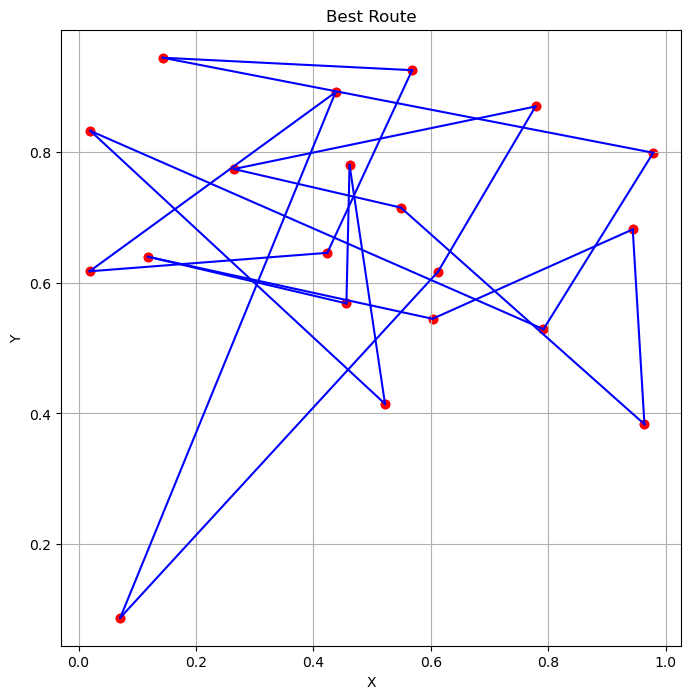

In [280]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_total_distance(route, dist_matrix):
    """Calculate the total distance of a route."""
    n = len(route)
    return sum(dist_matrix[route[i]][route[(i + 1) % n]] for i in range(n))

def generate_initial_route(n, start_city):
    """Generate a permutation starting with a specific city."""
    remaining_cities = [city for city in range(n) if city != start_city]
    np.random.shuffle(remaining_cities)
    return [start_city] + remaining_cities

def generate_neighbor(route):
    """Swap two adjacent cities in the route (with wraparound)."""
    n = len(route)
    i = np.random.randint(n)
    j = (i + 1) % n
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route, i

def calculate_delta(route, swapped_index, dist_matrix):
    """Compute the change in distance from swapping adjacent cities."""
    n = len(route)
    i = swapped_index
    j = (i + 1) % n
    prev = (i - 1) % n
    next_ = (j + 1) % n
    
    a, b, c, d = route[prev], route[i], route[j], route[next_]
    
    old_cost = dist_matrix[a][b] + dist_matrix[b][c] + dist_matrix[c][d]
    new_cost = dist_matrix[a][c] + dist_matrix[c][b] + dist_matrix[b][d]
    return new_cost - old_cost

def tsp_mcmc(dist_matrix, num_iter, T, start_city=0):
    """MCMC algorithm for solving TSP with a fixed starting point."""
    n = len(dist_matrix)
    np.random.seed(10)  # Fix the random seed
    current_route = generate_initial_route(n, start_city)
    current_distance = calculate_total_distance(current_route, dist_matrix)
    best_route, best_distance = current_route.copy(), current_distance
    
    for _ in range(num_iter):
        new_route, swapped_i = generate_neighbor(current_route)
        
        # Ensure the start city remains fixed
        if new_route[0] != start_city:
            new_route = [start_city] + new_route[1:]
            # Adjust swapped_i if necessary
            if swapped_i == 0:
                swapped_i = 1
            elif swapped_i > 0:
                swapped_i -= 1
        
        delta = calculate_delta(current_route, swapped_i, dist_matrix)
        
        if delta < 0 or (T > 0 and np.random.rand() < np.exp(-delta / T)):
            current_route = new_route
            current_distance += delta
            
            if current_distance < best_distance:
                best_route, best_distance = current_route.copy(), current_distance
                
    return best_route, best_distance

# Example usage
dist_matrix = np.array([[ 0,  2,  1,  7,  3,  8,  3,  2,  3,  4,  1,  8, 10,  7,  1,  2,
         1,  2,  8,  7],
       [ 2,  0,  5,  1, 10,  1,  2, 10,  1,  2,  4,  7,  1,  9,  9,  7,
         3,  5, 10,  1],
       [ 1,  5,  0,  1, 10,  9,  4,  1,  6,  8,  7,  5,  3,  9,  2,  1,
         1,  2,  2,  2],
       [ 7,  1,  1,  0,  9,  3,  9,  2,  2,  2,  3,  3,  3,  8,  4,  1,
         6,  1,  8,  7],
       [ 3, 10, 10,  9,  0,  3,  3,  3,  4, 10,  6,  1, 10,  3,  4,  8,
         2,  8,  6,  9],
       [ 8,  1,  9,  3,  3,  0,  7, 10,  5,  3,  1,  1,  7,  4,  9,  7,
         8,  6,  3,  7],
       [ 3,  2,  4,  9,  3,  7,  0,  8,  7,  2,  1, 10,  6,  2,  6,  2,
        10, 10,  6,  1],
       [ 2, 10,  1,  2,  3, 10,  8,  0,  5,  4,  3,  5,  9,  2,  6,  4,
         2,  3,  1,  7],
       [ 3,  1,  6,  2,  4,  5,  7,  5,  0,  7,  7, 10,  2,  7,  6,  1,
         4,  8,  2,  5],
       [ 4,  2,  8,  2, 10,  3,  2,  4,  7,  0,  6,  4,  7,  4,  8,  7,
         2,  6,  2,  7],
       [ 1,  4,  7,  3,  6,  1,  1,  3,  7,  6,  0,  7, 10,  3,  7,  3,
         9,  6,  9,  6],
       [ 8,  7,  5,  3,  1,  1, 10,  5, 10,  4,  7,  0, 10,  1,  1,  1,
         4,  6,  1,  8],
       [10,  1,  3,  3, 10,  7,  6,  9,  2,  7, 10, 10,  0,  8, 10,  9,
         8,  8,  2,  7],
       [ 7,  9,  9,  8,  3,  4,  2,  2,  7,  4,  3,  1,  8,  0,  5,  5,
         1,  2,  7,  3],
       [ 1,  9,  2,  4,  4,  9,  6,  6,  6,  8,  7,  1, 10,  5,  0,  1,
         3,  9,  8,  5],
       [ 2,  7,  1,  1,  8,  7,  2,  4,  1,  7,  3,  1,  9,  5,  1,  0,
         2,  3, 10,  1],
       [ 1,  3,  1,  6,  2,  8, 10,  2,  4,  2,  9,  4,  8,  1,  3,  2,
         0,  2,  1,  8],
       [ 2,  5,  2,  1,  8,  6, 10,  3,  8,  6,  6,  6,  8,  2,  9,  3,
         2,  0,  9,  8],
       [ 8, 10,  2,  8,  6,  3,  6,  1,  2,  2,  9,  1,  2,  7,  8, 10,
         1,  9,  0,  2],
       [ 7,  1,  2,  7,  9,  7,  1,  7,  5,  7,  6,  8,  7,  3,  5,  1,
         8,  8,  2,  0]])


start_city = 18  # Start from city 0
num_iter = 10000
T = 0.000001

best_route, best_distance = tsp_mcmc(dist_matrix, num_iter, T, start_city)
print(f"Best Route: {best_route}, Distance: {best_distance}")

# Generate random 2D coordinates for cities
np.random.seed(0)  # For reproducibility
city_coords = np.random.rand(len(dist_matrix), 2)

# Plotting the best route
plt.figure(figsize=(8, 8))
plt.title("Best Route")

for i in range(len(best_route)):
    city1 = best_route[i]
    city2 = best_route[(i + 1) % len(best_route)]
    
    plt.plot([city_coords[city1, 0], city_coords[city2, 0]], 
             [city_coords[city1, 1], city_coords[city2, 1]], 'b-')
    
    plt.scatter(city_coords[city1, 0], city_coords[city1, 1], c='r', marker='o')
    plt.scatter(city_coords[city2, 0], city_coords[city2, 1], c='r', marker='o')

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


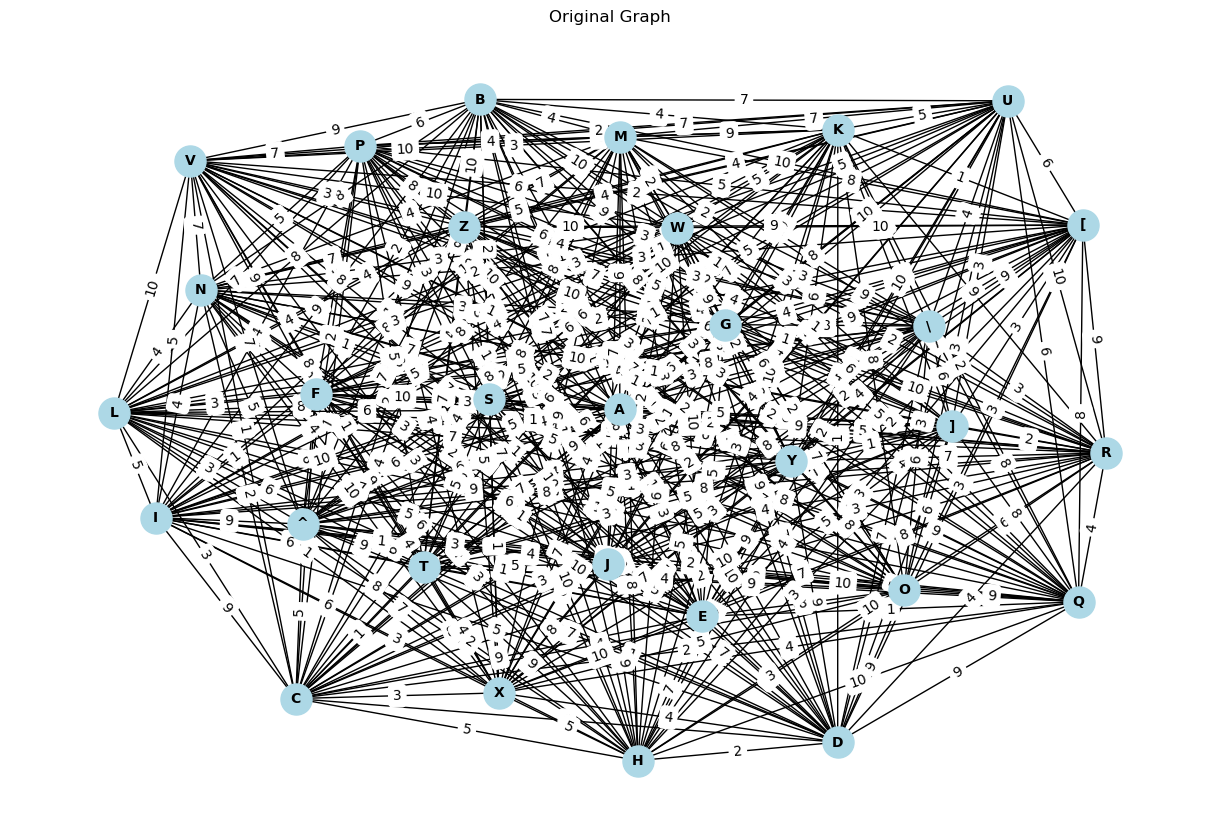

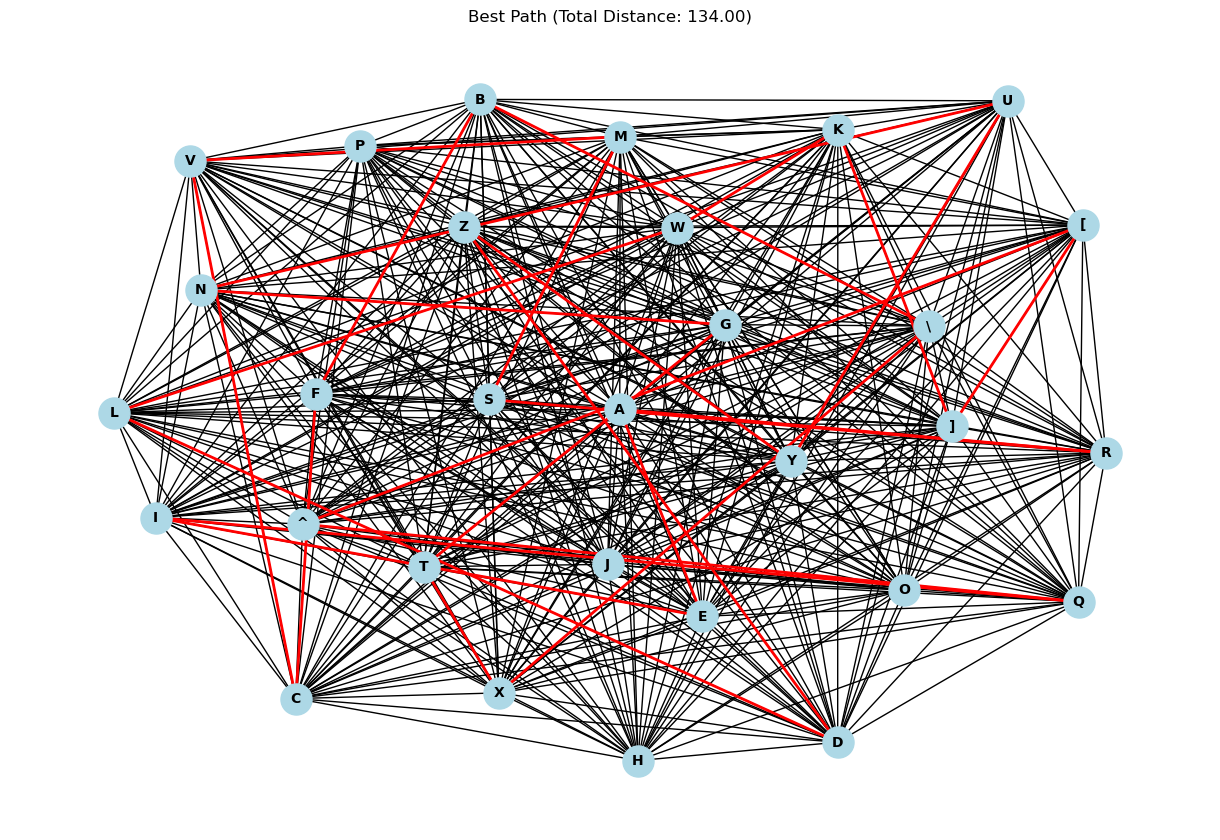

Best Path: S -> S -> S -> M -> V -> C -> F -> B -> \ -> X -> T -> G -> N -> U -> Y -> Z -> D -> L -> W -> K -> ] -> [ -> ^ -> Q -> I -> E -> A -> R -> S -> S
Total Distance: 134.00


In [276]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assign names to nodes
node_names = [chr(65 + i) for i in range(len(dist_matrix))]

# Create a graph from the distance matrix
G = nx.Graph()
for i in range(len(dist_matrix)):
    for j in range(i+1, len(dist_matrix)):
        G.add_edge(node_names[i], node_names[j], weight=dist_matrix[i][j])

# Plot the original graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Graph")
plt.show()

# Plot the best path
best_path = [node_names[i] for i in best_route]
best_path_edges = list(zip(best_path, best_path[1:] + [best_path[0]]))

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=best_path_edges, edge_color='r', width=2)
plt.title(f"Best Path (Total Distance: {best_distance:.2f})")
plt.show()

print(f"Best Path: {' -> '.join(best_path)}")
print(f"Total Distance: {best_distance:.2f}")


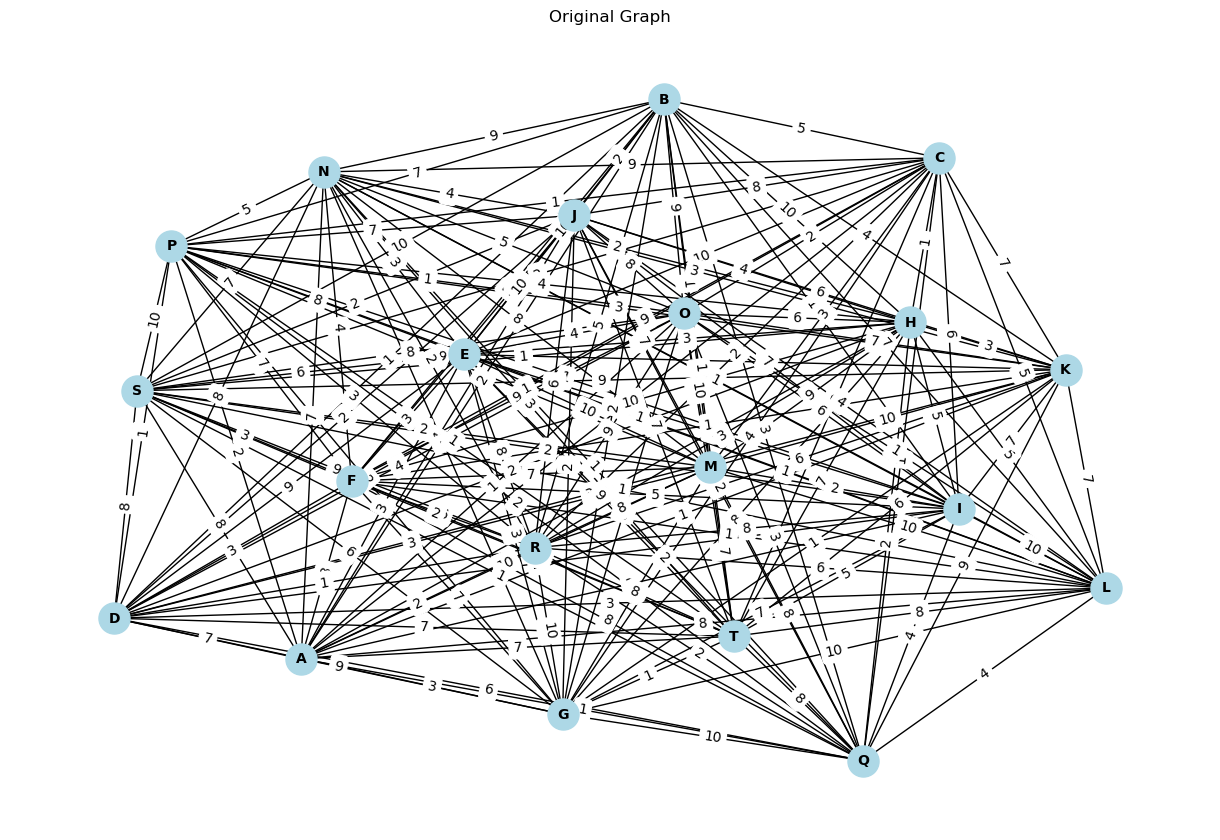

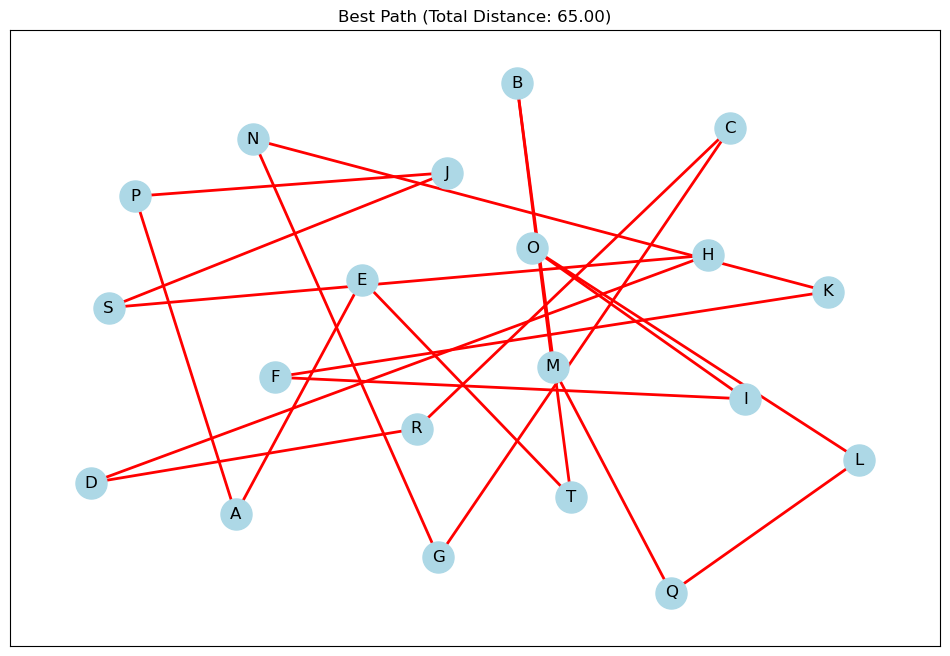

Best Path: S -> H -> D -> R -> C -> G -> N -> K -> F -> I -> O -> L -> Q -> M -> B -> T -> E -> A -> P -> J
Total Distance: 65.00


In [178]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assign names to nodes
node_names = [chr(65 + i) for i in range(len(dist_matrix))]

# Create a graph from the distance matrix
G = nx.Graph()
for i in range(len(dist_matrix)):
    for j in range(i+1, len(dist_matrix)):
        G.add_edge(node_names[i], node_names[j], weight=dist_matrix[i][j])

# Plot the original graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Graph")
plt.show()

# Plot the best path
best_path = [node_names[i] for i in best_route]
best_path_edges = list(zip(best_path, best_path[1:] + [best_path[0]]))

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=best_path_edges, edge_color='r', width=2)
plt.title(f"Best Path (Total Distance: {best_distance:.2f})")
plt.show()

print(f"Best Path: {' -> '.join(best_path)}")
print(f"Total Distance: {best_distance:.2f}")


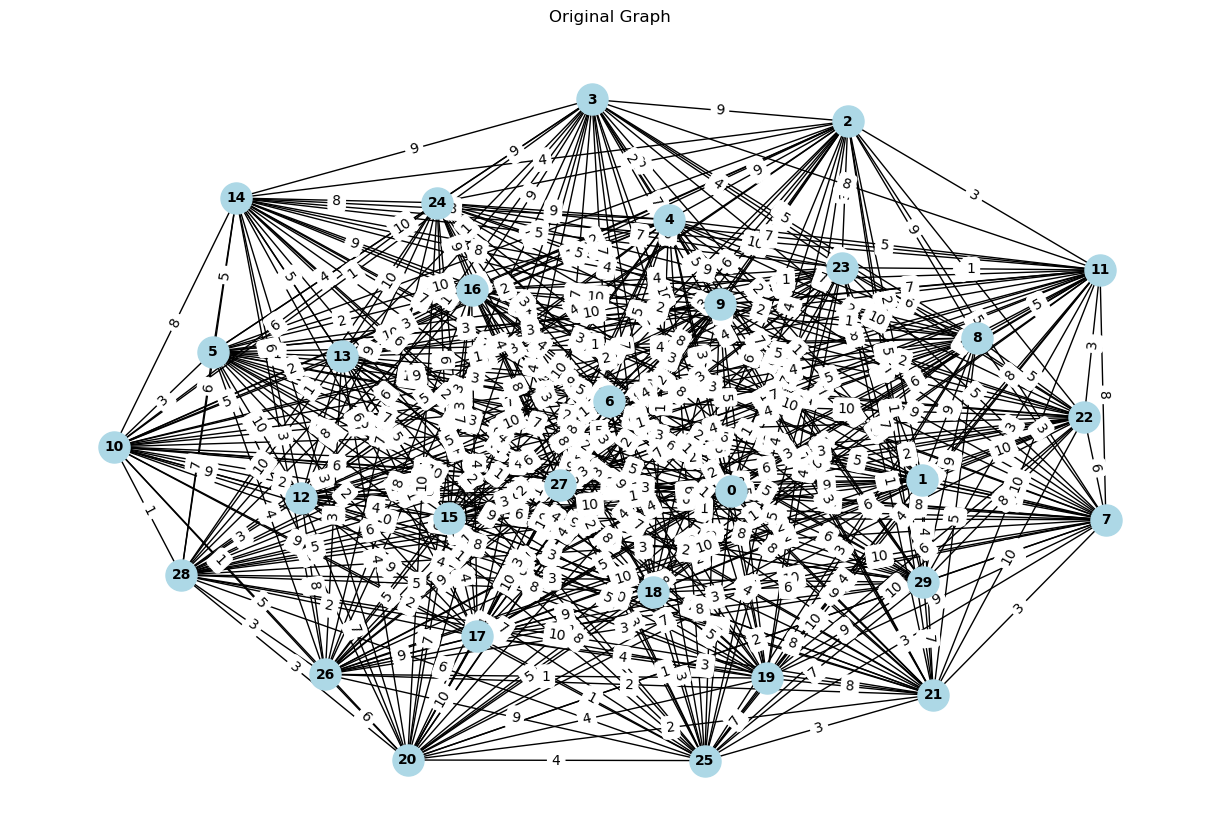

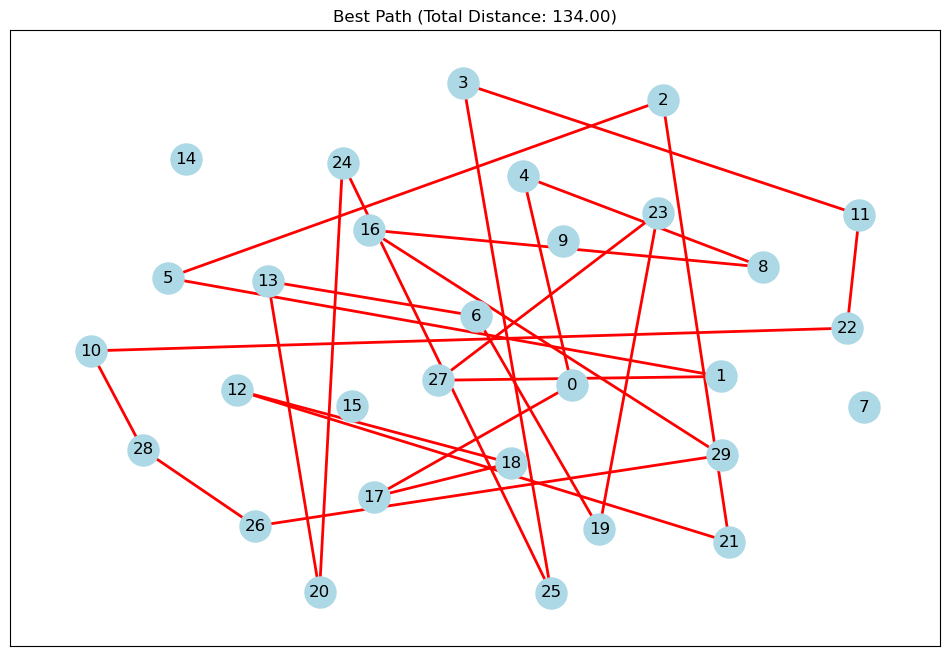

Best Path: 18 -> 18 -> 18 -> 12 -> 21 -> 2 -> 5 -> 1 -> 27 -> 23 -> 19 -> 6 -> 13 -> 20 -> 24 -> 25 -> 3 -> 11 -> 22 -> 10 -> 28 -> 26 -> 29 -> 16 -> 8 -> 4 -> 0 -> 17 -> 18 -> 18
Total Distance: 134.00


In [278]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assign names to nodes (numbers starting from 0)
node_names = [str(i) for i in range(len(dist_matrix))]

# Create a graph from the distance matrix
G = nx.Graph()
for i in range(len(dist_matrix)):
    for j in range(i+1, len(dist_matrix)):
        G.add_edge(node_names[i], node_names[j], weight=dist_matrix[i][j])

# Plot the original graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Graph")
plt.show()

# Plot the best path
best_path = [node_names[i] for i in best_route]
best_path_edges = list(zip(best_path, best_path[1:] + [best_path[0]]))

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=best_path_edges, edge_color='r', width=2)
plt.title(f"Best Path (Total Distance: {best_distance:.2f})")
plt.show()

print(f"Best Path: {' -> '.join(best_path)}")
print(f"Total Distance: {best_distance:.2f}")


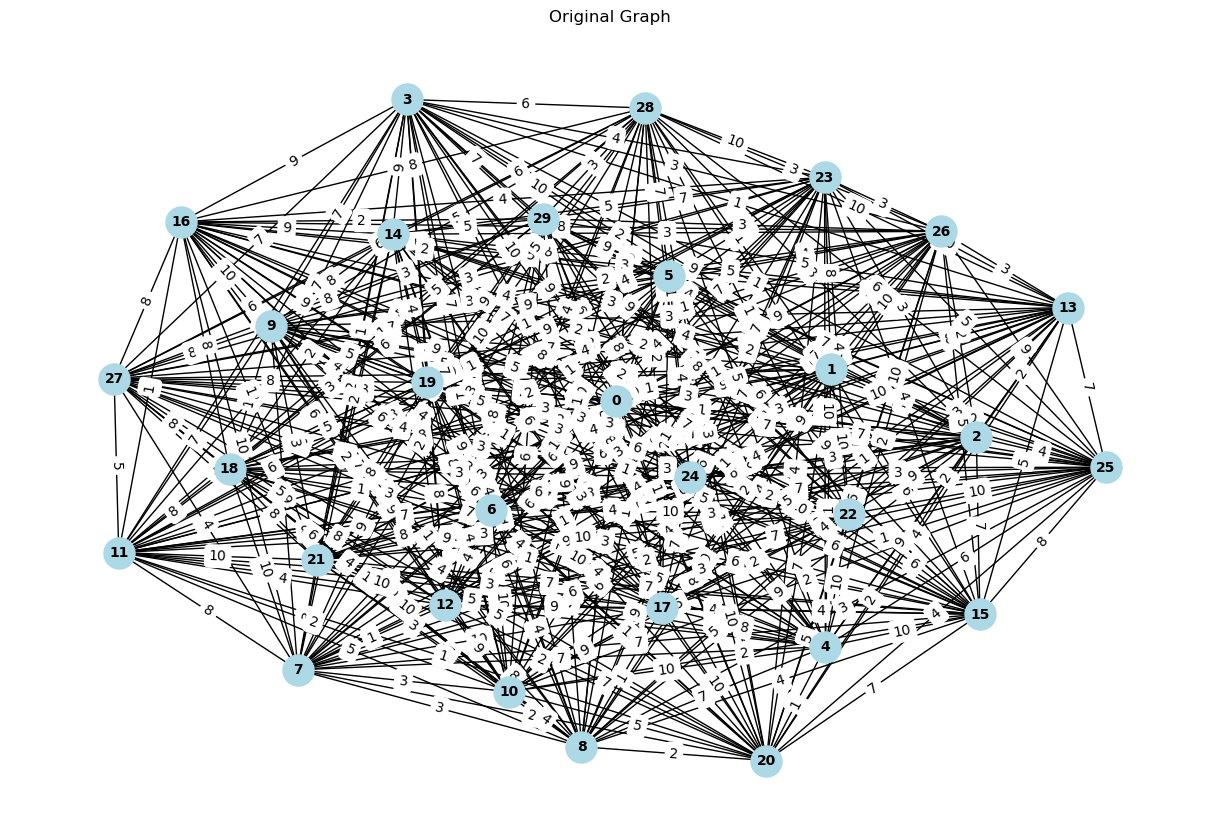

/var/folders/h3/lplmwndn2l1cw5q526nm0rlh0000gn/T/ipykernel_50830/1254086382.py:30: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edgelist=best_path_edges, edge_color='r', width=2, arrowsize=20)


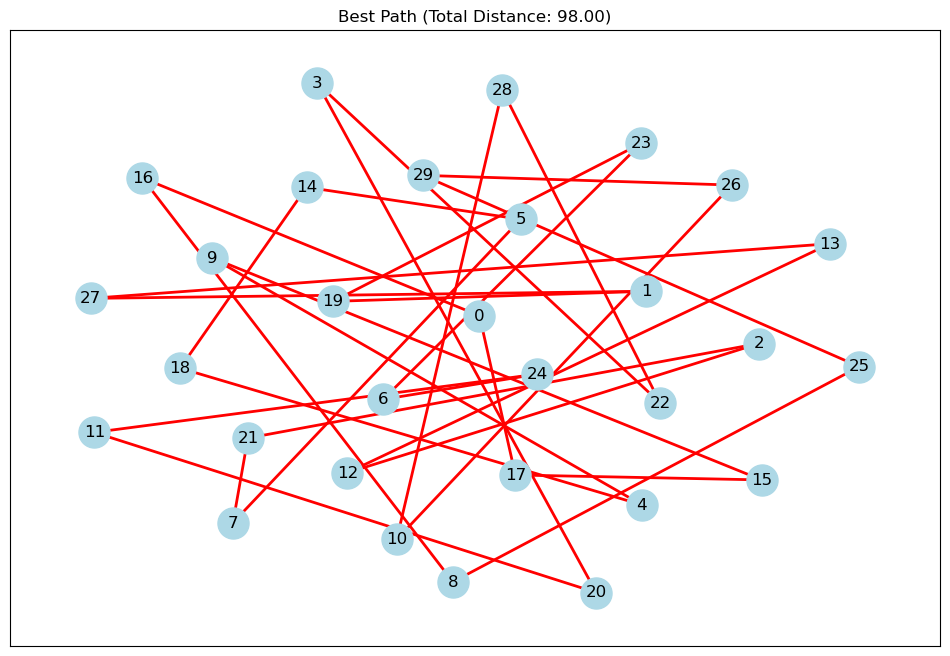

Best Path: 18 -> 14 -> 5 -> 7 -> 21 -> 2 -> 12 -> 13 -> 27 -> 1 -> 19 -> 23 -> 6 -> 24 -> 11 -> 20 -> 3 -> 22 -> 28 -> 10 -> 26 -> 29 -> 25 -> 8 -> 16 -> 0 -> 17 -> 15 -> 9 -> 4
Total Distance: 98.00


In [242]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assign names to nodes (numbers starting from 0)
node_names = [str(i) for i in range(len(dist_matrix))]

# Create a graph from the distance matrix
G = nx.Graph()
for i in range(len(dist_matrix)):
    for j in range(i+1, len(dist_matrix)):
        G.add_edge(node_names[i], node_names[j], weight=dist_matrix[i][j])

# Plot the original graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Graph")
plt.show()

# Plot the best path
best_path = [node_names[i] for i in best_route]
best_path_edges = list(zip(best_path, best_path[1:] + [best_path[0]]))

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=best_path_edges, edge_color='r', width=2, arrowsize=20)
plt.title(f"Best Path (Total Distance: {best_distance:.2f})")
plt.show()

print(f"Best Path: {' -> '.join(best_path)}")
print(f"Total Distance: {best_distance:.2f}")


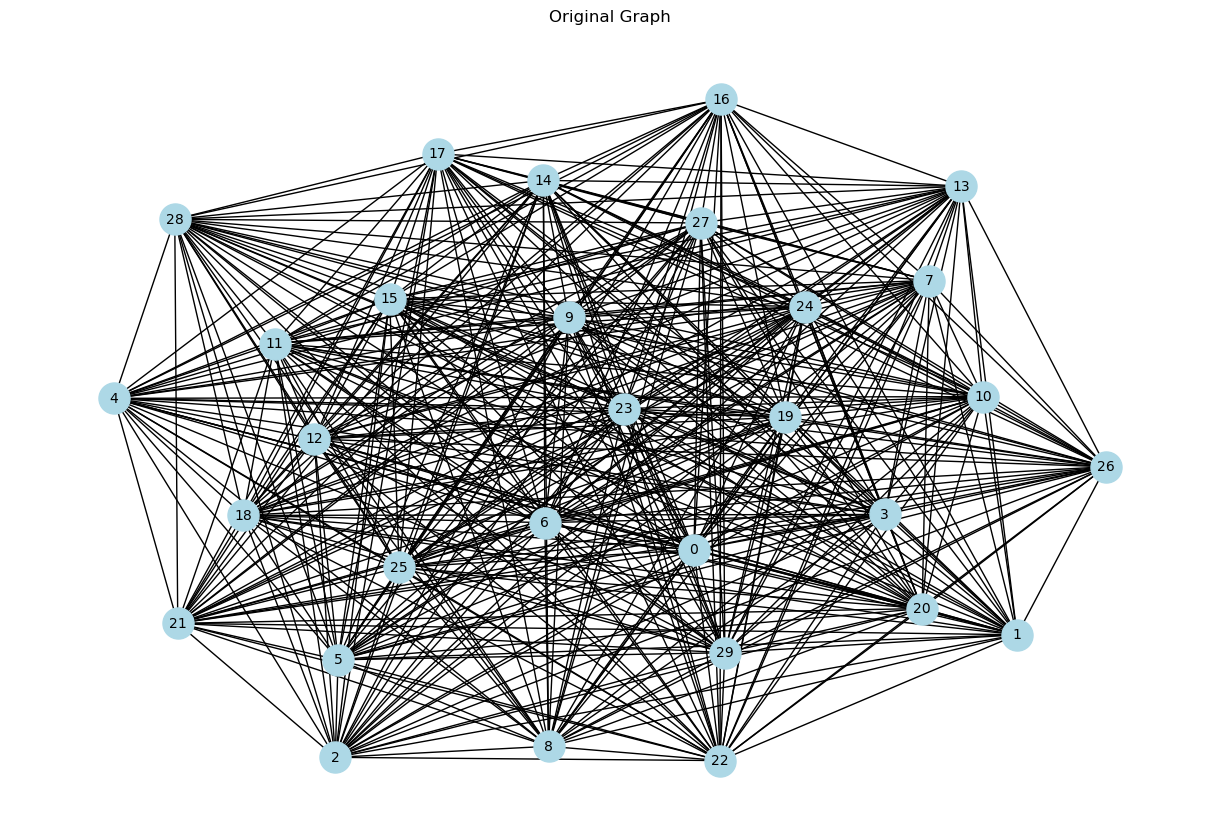

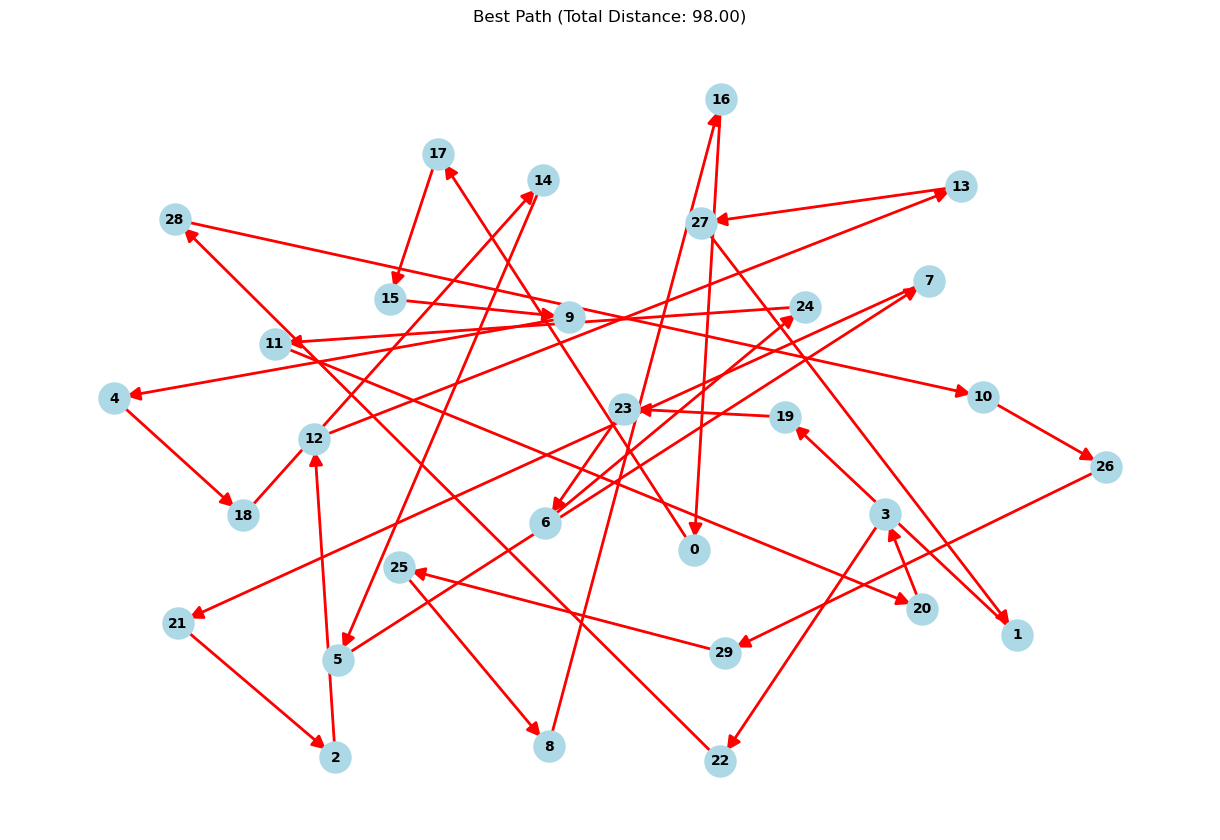

Best Path: 18 -> 14 -> 5 -> 7 -> 21 -> 2 -> 12 -> 13 -> 27 -> 1 -> 19 -> 23 -> 6 -> 24 -> 11 -> 20 -> 3 -> 22 -> 28 -> 10 -> 26 -> 29 -> 25 -> 8 -> 16 -> 0 -> 17 -> 15 -> 9 -> 4
Total Distance: 98.00


In [240]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assign names to nodes (numbers starting from 0)
node_names = [str(i) for i in range(len(dist_matrix))]

# Create a graph from the distance matrix
G = nx.Graph()
for i in range(len(dist_matrix)):
    for j in range(i+1, len(dist_matrix)):
        G.add_edge(node_names[i], node_names[j], weight=dist_matrix[i][j])

# Plot the original graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight=None)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Graph")
plt.show()

# Plot the best path
best_path = [node_names[i] for i in best_route]
best_path_edges = list(zip(best_path, best_path[1:] + [best_path[0]]))

# Convert to a directed graph for arrows
DG = nx.DiGraph()
for edge in best_path_edges:
    DG.add_edge(*edge)

plt.figure(figsize=(12, 8))
nx.draw(DG, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
nx.draw_networkx_edges(DG, pos, edgelist=best_path_edges, edge_color='r', width=2, arrows=True, arrowsize=20)
plt.title(f"Best Path (Total Distance: {best_distance:.2f})")
plt.show()

print(f"Best Path: {' -> '.join(best_path)}")
print(f"Total Distance: {best_distance:.2f}")


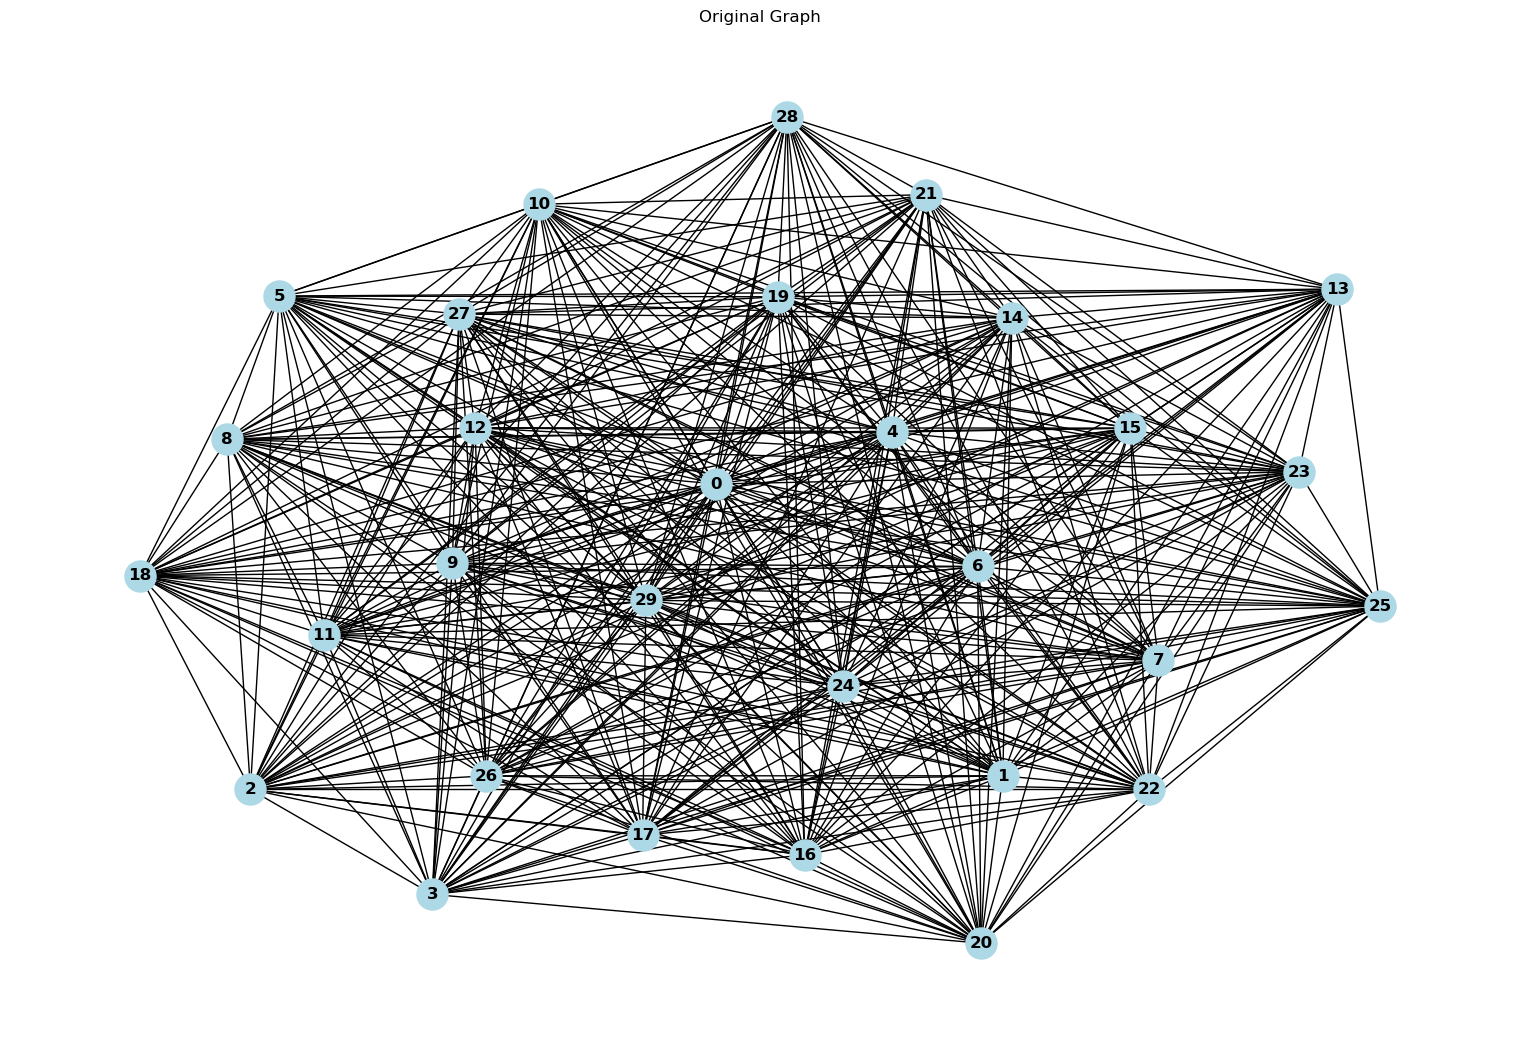

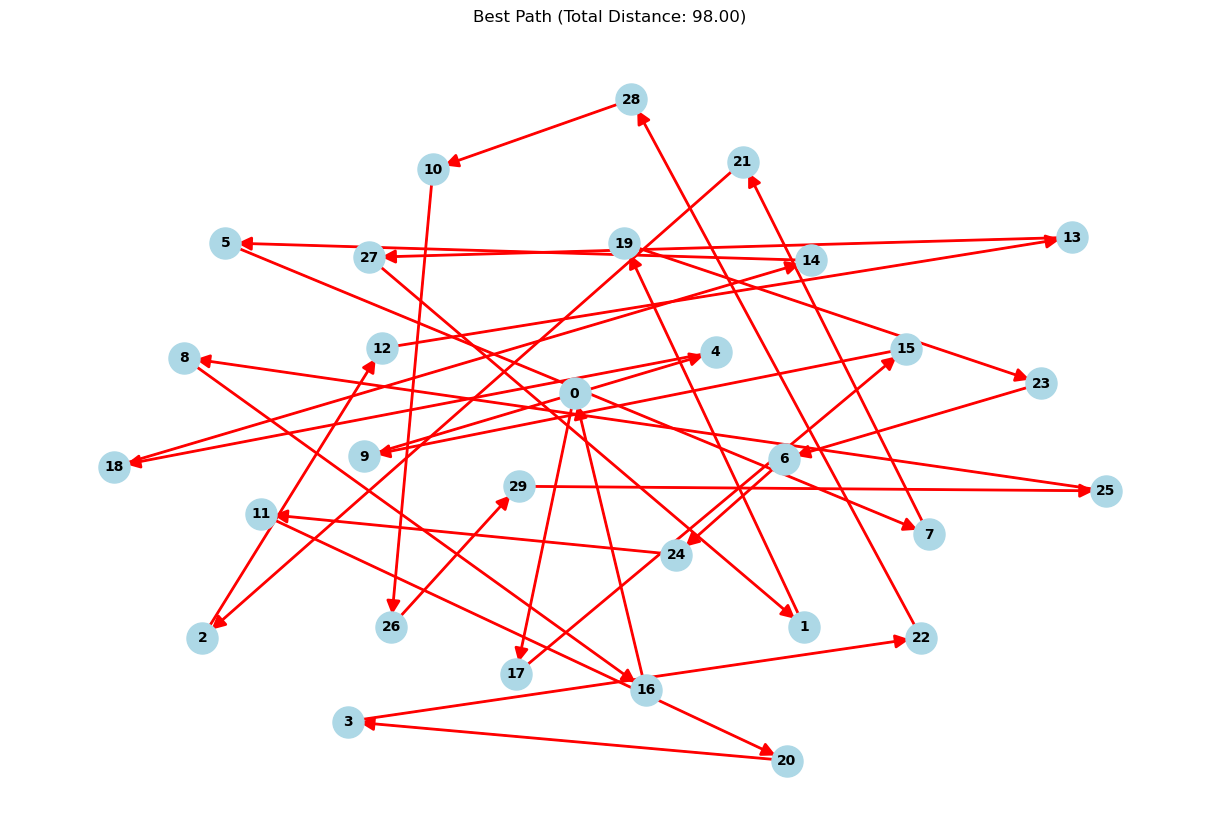

Best Path: 18 -> 14 -> 5 -> 7 -> 21 -> 2 -> 12 -> 13 -> 27 -> 1 -> 19 -> 23 -> 6 -> 24 -> 11 -> 20 -> 3 -> 22 -> 28 -> 10 -> 26 -> 29 -> 25 -> 8 -> 16 -> 0 -> 17 -> 15 -> 9 -> 4
Total Distance: 98.00


In [238]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assign names to nodes (numbers starting from 0)
node_names = [str(i) for i in range(len(dist_matrix))]

# Create a graph from the distance matrix
G = nx.Graph()
for i in range(len(dist_matrix)):
    for j in range(i+1, len(dist_matrix)):
        G.add_edge(node_names[i], node_names[j], weight=dist_matrix[i][j])

# Plot the original graph
plt.figure(figsize=(15, 10))  # Increased figure size
pos = nx.spring_layout(G, k=0.5)  # Adjusted spring layout parameter
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold')
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')  # Turn off axis to focus on graph
plt.title("Original Graph")
plt.show()

# Plot the best path
best_path = [node_names[i] for i in best_route]
best_path_edges = list(zip(best_path, best_path[1:] + [best_path[0]]))

# Convert to a directed graph for arrows
DG = nx.DiGraph()
for edge in best_path_edges:
    DG.add_edge(*edge)

plt.figure(figsize=(12, 8))
nx.draw(DG, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
nx.draw_networkx_edges(DG, pos, edgelist=best_path_edges, edge_color='r', width=2, arrows=True, arrowsize=20)
plt.title(f"Best Path (Total Distance: {best_distance:.2f})")
plt.show()

print(f"Best Path: {' -> '.join(best_path)}")
print(f"Total Distance: {best_distance:.2f}")
